In [25]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
`sys_prefix` level settings are read-only, using `user` level for migration to `lockedExtensions`
/usr/lib/python3.13/site-packages/jupyterlab/debuglog.py:54: UserWarning: An error occurred.
  warnings.warn("An error occurred.")
/usr/lib/python3.13/site-packages/jupyterlab/debuglog.py:55: UserWarning: PermissionError: [Errno 13] Permission denied: '/usr/share/jupyter/lab/extensions/jupyter-widgets-jupyterlab-manager-5.0.15.tgz'
  warnings.warn(msg[-1].strip())
/usr/lib/python3.13/site-packages/jupyterlab/debuglog.py:56: UserWarning: See the log file for details: /tmp/jupyterlab-debug-j58yzwcd.log
  warnings.warn(f"See the log file for details: {log_path!s}")


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
from IPython.display import display
from ipywidgets import interactive, IntSlider

In [22]:
# Generate synthetic data (circle)
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

In [23]:
# Function to update and display the plot
def update_plot(hidden_layer_size):
    # Create a multi-layer perceptron (MLP) classifier
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), 
                        activation='relu', max_iter=3000, random_state=1)

    # Fit the classifier to the data
    clf.fit(X, y)

    # Create a grid of points for visualization
    x_vals = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
    y_vals = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100)
    X_plane, Y_plane = np.meshgrid(x_vals, y_vals)
    grid_points = np.column_stack((X_plane.ravel(), Y_plane.ravel()))

    # Predict class labels for the grid points (for decision boundary)
    Z = clf.predict(grid_points)
    Z = Z.reshape(X_plane.shape)

    # Predict class labels for the original data points
    y_pred = clf.predict(X)

    # Clear previous plot
    plt.clf()

    # Plot the decision boundary
    plt.contourf(X_plane, Y_plane, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    
    # Plot title
    plt.title(f"MLP with {hidden_layer_size} hidden units")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

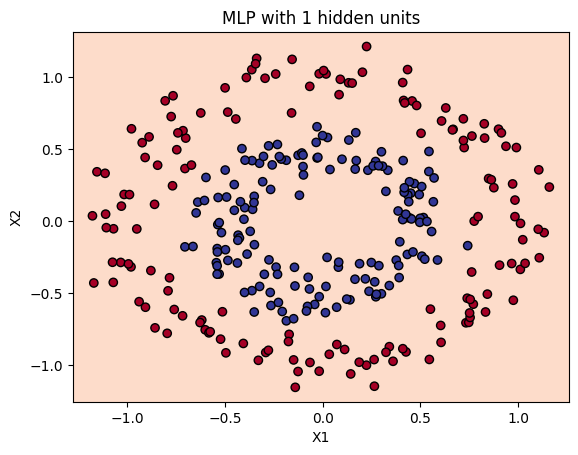

interactive(children=(IntSlider(value=1, description='Hidden Layer Size', max=10, min=1), Output()), _dom_clas…

In [24]:
# Create a slider for the hidden layer  size
hidder_layer_size_slider = IntSlider(value=1, min=1, max=10, step=1, description="Hidden Layer Size")

# Create interactive widget for hidden layer size
interactive_plot = interactive(update_plot, hidden_layer_size=hidder_layer_size_slider)
display(interactive_plot)